### Used Car Prices in India

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
from pandas import Series, DataFrame
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import mean_absolute_error

### 1. Reading the dataset into the Python Environment:

In [3]:
dataset = pd.read_csv('cardekho_updated.csv')
dataset.head(5)

,full_name,selling_price,new_price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,Maruti Alto Std,1.2 Lakh*,NaN,2012,Individual,"1,20,000 kms",First Owner,Petrol,Manual,Mileage19.7 kmpl,Engine796 CC,Max Power46.3 bhp,Seats5
1,Hyundai Grand i10 Asta,5.5 Lakh*,New Car (On-Road Price) : Rs.7.11-7.48 Lakh*,2016,Individual,"20,000 kms",First Owner,Petrol,Manual,Mileage18.9 kmpl,Engine1197 CC,Max Power82 bhp,Seats5
2,Hyundai i20 Asta,2.15 Lakh*,NaN,2010,Individual,"60,000 kms",First Owner,Petrol,Manual,Mileage17.0 kmpl,Engine1197 CC,Max Power80 bhp,Seats5
3,Maruti Alto K10 2010-2014 VXI,2.26 Lakh*,NaN,2012,Individual,"37,000 kms",First Owner,Petrol,Manual,Mileage20.92 kmpl,Engine998 CC,Max Power67.1 bhp,Seats5
4,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,5.7 Lakh*,New Car (On-Road Price) : Rs.10.14-13.79 Lakh*,2015,Dealer,"30,000 kms",First Owner,Diesel,Manual,Mileage22.77 kmpl,Engine1498 CC,Max Power98.59 bhp,Seats5


#### Checking the basic details of the dataset:

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19974 entries, 0 to 19973
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   full_name          19974 non-null  object
 1   selling_price      19974 non-null  object
 2   new_price          9564 non-null   object
 3   year               19974 non-null  int64 
 4   seller_type        19974 non-null  object
 5   km_driven          19974 non-null  object
 6   owner_type         19974 non-null  object
 7   fuel_type          19974 non-null  object
 8   transmission_type  19974 non-null  object
 9   mileage            19814 non-null  object
 10  engine             19864 non-null  object
 11  max_power          19637 non-null  object
 12  seats              19887 non-null  object
dtypes: int64(1), object(12)
memory usage: 2.0+ MB


In [5]:
dataset.shape

(19974, 13)

In [6]:
dataset.describe(include = 'all')

,full_name,selling_price,new_price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage,engine,max_power,seats
count,19974,19974,9564,19974.000000,19974,19974,19974,19974,19974,19814,19864,19637,19887
unique,3321,1215,1744,NaN,3,4515,1,5,2,561,169,493,9
top,Maruti Swift Dzire VDI,4.5 Lakh*,New Car (On-Road Price) : Rs.12.68-16.80 Lakh*,NaN,Dealer,"50,000 kms",First Owner,Diesel,Manual,Mileage18.9 kmpl,Engine1197 CC,Max Power74 bhp,Seats5
freq,210,466,144,NaN,11970,750,19974,9815,16025,624,2662,867,16585
mean,NaN,NaN,NaN,2014.526134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,3.248791,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,1991.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,2015.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Checking the missing values in te dataset

In [7]:
dataset.isna().sum()

full_name                0
selling_price            0
new_price            10410
year                     0
seller_type              0
km_driven                0
owner_type               0
fuel_type                0
transmission_type        0
mileage                160
engine                 110
max_power              337
seats                   87
dtype: int64

### Insights:
        
          The dataset consist of 19974 rows and 13 columns. 
          It has more object type features and one numerical variable in the columns. 
          There are missing values in the features like new_price, mileage,engine, max_power and seats.

### 2. Preprocessing steps :

#### 1. Cleaning the data :

In [8]:
dataset.dtypes

full_name            object
selling_price        object
new_price            object
year                  int64
seller_type          object
km_driven            object
owner_type           object
fuel_type            object
transmission_type    object
mileage              object
engine               object
max_power            object
seats                object
dtype: object

In [9]:
for i in range(dataset.shape[0]):
    try:
        price = float(dataset['selling_price'][i].split(' ')[0])
        digit = dataset['selling_price'][i].split(' ')[1]
        #price = float(dataset['selling_price'][i])
        #digit = dataset['selling_price'][i]
        if digit == 'Lakh*':
            price = price * 100000
            dataset['selling_price'][i] = price
        elif digit == 'Cr*':
            price = price * 10000000
            dataset['selling_price'][i] = price
    except:
        price = dataset['selling_price'][i][:-1]
        price = price.replace(',', '')
        dataset['selling_price'][i] = float(price)
#dataset

In [10]:
## Converting the feature selling_price into float:

dataset['selling_price'] = dataset['selling_price'].astype(float, errors = 'raise')

dataset.dtypes

full_name             object
selling_price        float64
new_price             object
year                   int64
seller_type           object
km_driven             object
owner_type            object
fuel_type             object
transmission_type     object
mileage               object
engine                object
max_power             object
seats                 object
dtype: object

In [11]:
## Converting the some of the required fetures from object into float that matters the predicting feature - 'Selling Price'

dataset['km_driven'] = dataset['km_driven'].str.split(' ', n=1, expand=True)[0]
dataset['km_driven'] = dataset['km_driven'].str.replace(',','')
# Mileage
#dataset['mileage'] = dataset['mileage'].str.split(' ', expand=True)[0].str.split('e', expand=True)[2]
# Engine
#dataset['engine'] = dataset['engine'].str.split(' ', expand=True)[0].str.split('e',expand=True)[1]
# Max Power
#dataset['max_power'] = dataset['max_power'].str.split(' ', expand=True)[1].str.split('r',expand=True)[1]
# Seats 
#dataset['seats'] = dataset['seats'].str.split('s', expand=True)[1]



In [12]:
dataset['km_driven']= dataset['km_driven'].astype(float, errors = 'raise')
#dataset['mileage']= dataset['mileage'].astype(float, errors = 'raise')
#dataset['engine']= dataset['engine'].astype(float, errors = 'raise')
#dataset['max_power']= dataset['max_power'].astype(float, errors = 'raise')
#dataset['seats']= dataset['seats'].astype(float, errors = 'raise')

In [13]:
dataset.dtypes

full_name             object
selling_price        float64
new_price             object
year                   int64
seller_type           object
km_driven            float64
owner_type            object
fuel_type             object
transmission_type     object
mileage               object
engine                object
max_power             object
seats                 object
dtype: object

### 2. Filling the missing values in the dataset:

In [14]:
obj_cols = list(dataset.select_dtypes('object').columns)
for o in obj_cols:
    dataset[o].fillna("NULL",inplace = True)

In [15]:
obj_cols = list(dataset.select_dtypes('float').columns)
for o in obj_cols:
   dataset[o].fillna('NULL',inplace = True)

In [16]:
dataset.isna().sum()

full_name            0
selling_price        0
new_price            0
year                 0
seller_type          0
km_driven            0
owner_type           0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
dtype: int64

#### Insights:
            
             We have filled the missing values in the dataset.

### 3. Outlier Detection and Handling:

a. Checking the Outliers in the dataset:
    
        Inorder to check the outliers, we need to plot boxplot of the features using percentiles.

(array([1, 2, 3]),
 [Text(1, 0, 'selling_price'), Text(2, 0, 'year'), Text(3, 0, 'km_driven')])

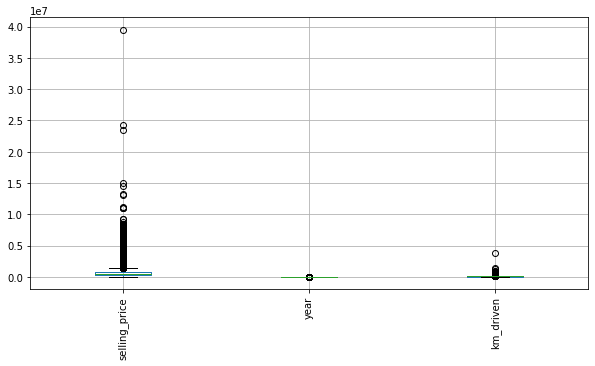

In [17]:
### Box ploting the features which has outliers:

plt.figure(figsize=(10,5))
dataset.boxplot()
plt.xticks(rotation=90)

###### b. Handling outliers in 'year' variable

Text(0.5, 1.0, 'Box plot of year')

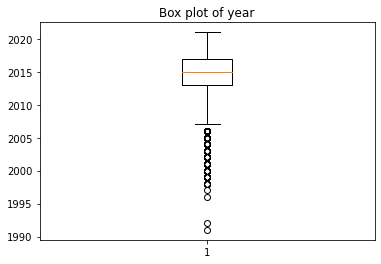

In [18]:
### Handling outliers in 'year' variable

plt.boxplot(dataset['year'])
plt.title('Box plot of year')

In [19]:
Q1=np.percentile(dataset['year'], 25, interpolation = 'midpoint')
Q2=np.percentile(dataset['year'], 50, interpolation = 'midpoint')
Q3=np.percentile(dataset['year'], 75, interpolation = 'midpoint')
print("Q1 is : ", Q1)
print("Q2 is : ",Q2)
print("Q3 is : ",Q3)

Q1 is :  2013.0
Q2 is :  2015.0
Q3 is :  2017.0


In [20]:
dataset['year'].median()

2015.0

In [21]:
IQR= Q3 - Q1
low_lim = Q1 - 1.5* IQR
up_lim = Q3 + 1.5 * IQR


print("IQR is : ",IQR)
print("Lower Limit is :",round(low_lim))
print("Upper limit is: ",round(up_lim))

IQR is :  4.0
Lower Limit is : 2007
Upper limit is:  2023


In [22]:
outlier=[]
for x in dataset['year']:
    if((x>up_lim) or(x<low_lim)):
        outlier.append(x)
outlier

[2004,
 2006,
 2006,
 2000,
 2004,
 2005,
 2005,
 2005,
 2006,
 2005,
 2002,
 2000,
 2005,
 2006,
 2005,
 2004,
 1999,
 2006,
 2005,
 2006,
 2005,
 2003,
 1997,
 2004,
 2003,
 2005,
 2003,
 2006,
 2006,
 2005,
 2006,
 2004,
 2005,
 2003,
 2006,
 2004,
 2006,
 2006,
 2006,
 2006,
 2006,
 2006,
 2004,
 2005,
 1999,
 2006,
 2002,
 2000,
 1999,
 2005,
 2001,
 2006,
 2003,
 2003,
 2004,
 2001,
 1999,
 2006,
 2005,
 2001,
 2006,
 2003,
 2006,
 2006,
 2006,
 1992,
 2006,
 2001,
 2005,
 2005,
 2006,
 2006,
 2006,
 2006,
 2005,
 2005,
 2002,
 2006,
 2004,
 2003,
 2006,
 2005,
 2004,
 2003,
 2006,
 2006,
 2005,
 2004,
 2006,
 2006,
 2006,
 2006,
 2002,
 2004,
 2004,
 2005,
 2006,
 2006,
 2001,
 2006,
 2006,
 2000,
 2004,
 2006,
 2005,
 2006,
 2000,
 2002,
 1999,
 1999,
 2005,
 2002,
 2003,
 2003,
 2006,
 2005,
 2005,
 2005,
 2003,
 2005,
 2006,
 2006,
 2006,
 2004,
 2006,
 1999,
 2006,
 2005,
 2004,
 2006,
 2006,
 2006,
 2006,
 2005,
 2005,
 2006,
 2006,
 2003,
 2006,
 2006,
 2001,
 2005,
 2004,

In [23]:
dataset['year']=np.where(dataset['year']>up_lim,up_lim,np.where(dataset['year']<low_lim,low_lim,dataset['year']))
dataset

,full_name,selling_price,new_price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,Maruti Alto Std,120000.0,NULL,2012.0,Individual,120000.0,First Owner,Petrol,Manual,Mileage19.7 kmpl,Engine796 CC,Max Power46.3 bhp,Seats5
1,Hyundai Grand i10 Asta,550000.0,New Car (On-Road Price) : Rs.7.11-7.48 Lakh*,2016.0,Individual,20000.0,First Owner,Petrol,Manual,Mileage18.9 kmpl,Engine1197 CC,Max Power82 bhp,Seats5
2,Hyundai i20 Asta,215000.0,NULL,2010.0,Individual,60000.0,First Owner,Petrol,Manual,Mileage17.0 kmpl,Engine1197 CC,Max Power80 bhp,Seats5
3,Maruti Alto K10 2010-2014 VXI,226000.0,NULL,2012.0,Individual,37000.0,First Owner,Petrol,Manual,Mileage20.92 kmpl,Engine998 CC,Max Power67.1 bhp,Seats5
4,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,570000.0,New Car (On-Road Price) : Rs.10.14-13.79 Lakh*,2015.0,Dealer,30000.0,First Owner,Diesel,Manual,Mileage22.77 kmpl,Engine1498 CC,Max Power98.59 bhp,Seats5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19969,Toyota Platinum Etios 1.4 GXD,650000.0,NULL,2017.0,Dealer,69480.0,First Owner,Diesel,Manual,Mileage23.59 kmpl,Engine1364 CC,Max Power67.05 bhp,Seats5
19970,Maruti Ertiga BSIV VXI,925000.0,NULL,2019.0,Dealer,18000.0,First Owner,Petrol,Manual,Mileage17.5 kmpl,Engine1373 CC,Max Power91.1 bhp,Seats7
19971,Skoda Rapid 1.5 TDI Elegance,425000.0,NULL,2015.0,Dealer,67000.0,First Owner,Diesel,Manual,Mileage21.14 kmpl,Engine1498 CC,Max Power103.52 bhp,Seats5
19972,Mahindra XUV500 W6 2WD,1225000.0,New Car (On-Road Price) : Rs.17.83-24.91 Lakh*,2016.0,Dealer,3800000.0,First Owner,Diesel,Manual,Mileage16.0 kmpl,Engine2179 CC,Max Power140 bhp,Seats7


Text(0.5, 1.0, 'Box plot of year')

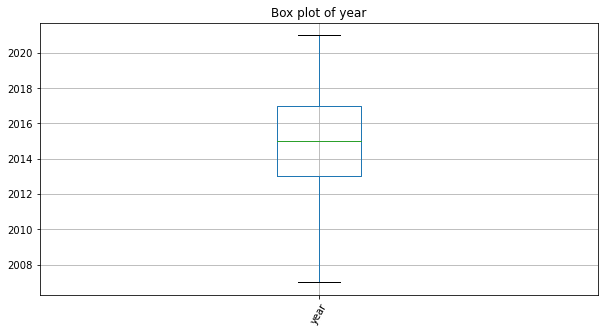

In [24]:
plt.figure(figsize=(10,5))
dataset.boxplot('year')
plt.xticks(rotation=60)
plt.title('Box plot of year')

Text(0.5, 1.0, 'Box plot of Kilometer Driven')

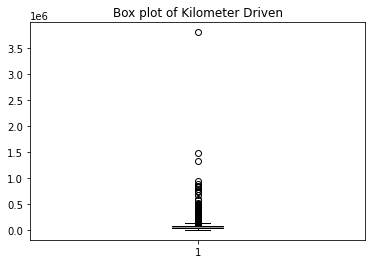

In [25]:
plt.boxplot(dataset['km_driven'])
plt.title('Box plot of Kilometer Driven')

In [26]:
Q1=np.percentile(dataset['km_driven'], 25, interpolation = 'midpoint')
Q2=np.percentile(dataset['km_driven'], 50, interpolation = 'midpoint')
Q3=np.percentile(dataset['km_driven'], 75, interpolation = 'midpoint')
print("Q1 is : ", Q1)
print("Q2 is : ",Q2)
print("Q3 is : ",Q3)

Q1 is :  31117.0
Q2 is :  52000.0
Q3 is :  74000.0


In [27]:
IQR= Q3 - Q1
low_lim = Q1 - 1.5* IQR
up_lim = Q3 + 1.5 * IQR


print("IQR is : ",IQR)
print("Lower Limit is :",round(low_lim))
print("Upper limit is: ",round(up_lim))

IQR is :  42883.0
Lower Limit is : -33208
Upper limit is:  138324


In [28]:
outlier=[]
for x in dataset['km_driven']:
    if((x>up_lim) or(x<low_lim)):
        outlier.append(x)
outlier

[185000.0,
 190000.0,
 160000.0,
 160000.0,
 240000.0,
 165000.0,
 185000.0,
 280000.0,
 220000.0,
 170000.0,
 162828.0,
 250000.0,
 142587.0,
 160800.0,
 350000.0,
 155000.0,
 140000.0,
 160000.0,
 150000.0,
 280000.0,
 155000.0,
 143000.0,
 200000.0,
 187031.0,
 170000.0,
 163000.0,
 208000.0,
 148000.0,
 160000.0,
 190000.0,
 175000.0,
 144000.0,
 150000.0,
 174926.0,
 150000.0,
 140000.0,
 387000.0,
 150000.0,
 215000.0,
 228000.0,
 200000.0,
 150000.0,
 170000.0,
 150000.0,
 140000.0,
 185000.0,
 170000.0,
 170000.0,
 162000.0,
 148736.0,
 186000.0,
 215000.0,
 147000.0,
 147626.0,
 160000.0,
 227000.0,
 200000.0,
 250000.0,
 160000.0,
 170000.0,
 145000.0,
 150000.0,
 155000.0,
 187500.0,
 140000.0,
 200000.0,
 295000.0,
 242924.0,
 160000.0,
 190000.0,
 200000.0,
 177000.0,
 150000.0,
 158000.0,
 184000.0,
 230000.0,
 215000.0,
 186000.0,
 142000.0,
 158000.0,
 145000.0,
 140000.0,
 164000.0,
 200000.0,
 174000.0,
 145000.0,
 165999.0,
 191876.0,
 500000.0,
 177000.0,
 140000.0,

In [29]:
dataset['km_driven']=np.where(dataset['km_driven']>up_lim,up_lim,np.where(dataset['km_driven']<low_lim,low_lim,dataset['km_driven']))
dataset

,full_name,selling_price,new_price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,Maruti Alto Std,120000.0,NULL,2012.0,Individual,120000.0,First Owner,Petrol,Manual,Mileage19.7 kmpl,Engine796 CC,Max Power46.3 bhp,Seats5
1,Hyundai Grand i10 Asta,550000.0,New Car (On-Road Price) : Rs.7.11-7.48 Lakh*,2016.0,Individual,20000.0,First Owner,Petrol,Manual,Mileage18.9 kmpl,Engine1197 CC,Max Power82 bhp,Seats5
2,Hyundai i20 Asta,215000.0,NULL,2010.0,Individual,60000.0,First Owner,Petrol,Manual,Mileage17.0 kmpl,Engine1197 CC,Max Power80 bhp,Seats5
3,Maruti Alto K10 2010-2014 VXI,226000.0,NULL,2012.0,Individual,37000.0,First Owner,Petrol,Manual,Mileage20.92 kmpl,Engine998 CC,Max Power67.1 bhp,Seats5
4,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,570000.0,New Car (On-Road Price) : Rs.10.14-13.79 Lakh*,2015.0,Dealer,30000.0,First Owner,Diesel,Manual,Mileage22.77 kmpl,Engine1498 CC,Max Power98.59 bhp,Seats5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19969,Toyota Platinum Etios 1.4 GXD,650000.0,NULL,2017.0,Dealer,69480.0,First Owner,Diesel,Manual,Mileage23.59 kmpl,Engine1364 CC,Max Power67.05 bhp,Seats5
19970,Maruti Ertiga BSIV VXI,925000.0,NULL,2019.0,Dealer,18000.0,First Owner,Petrol,Manual,Mileage17.5 kmpl,Engine1373 CC,Max Power91.1 bhp,Seats7
19971,Skoda Rapid 1.5 TDI Elegance,425000.0,NULL,2015.0,Dealer,67000.0,First Owner,Diesel,Manual,Mileage21.14 kmpl,Engine1498 CC,Max Power103.52 bhp,Seats5
19972,Mahindra XUV500 W6 2WD,1225000.0,New Car (On-Road Price) : Rs.17.83-24.91 Lakh*,2016.0,Dealer,138324.5,First Owner,Diesel,Manual,Mileage16.0 kmpl,Engine2179 CC,Max Power140 bhp,Seats7


Text(0.5, 1.0, 'Box plot of Kilometer Driven')

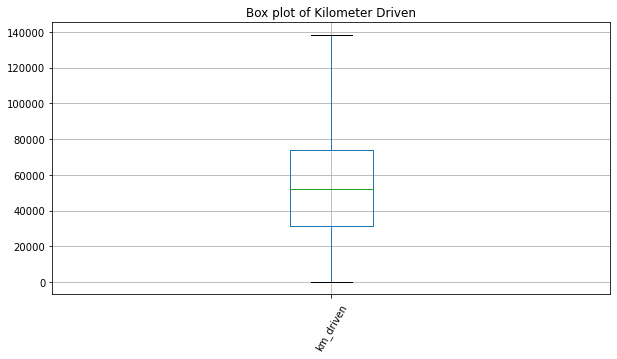

In [30]:
plt.figure(figsize=(10,5))
dataset.boxplot('km_driven')
plt.xticks(rotation=60)
plt.title('Box plot of Kilometer Driven')

#### Have checked and handled the outliers in the dataset using boxplot.

### 5. Label Encoding      
                
                Converting the labels into numeric form for the ease of Machine Learning models. Here the features of object type are changed into numerical values using encoding.

            

In [31]:
dataset.dtypes

full_name             object
selling_price        float64
new_price             object
year                 float64
seller_type           object
km_driven            float64
owner_type            object
fuel_type             object
transmission_type     object
mileage               object
engine                object
max_power             object
seats                 object
dtype: object

In [32]:
## Loading Label Encoder function

from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()

dataset.full_name = le.fit_transform(dataset.full_name)
#dataset.selling_price = le.fit_transform(dataset.selling_price)
dataset.new_price = le.fit_transform(dataset.new_price)
dataset.seller_type = le.fit_transform(dataset.seller_type)
dataset.fuel_type = le.fit_transform(dataset.fuel_type)
dataset.transmission_type = le.fit_transform(dataset.transmission_type)
dataset.engine = le.fit_transform(dataset.engine)
dataset.max_power = le.fit_transform(dataset.max_power)
dataset.seats = le.fit_transform(dataset.seats)
dataset.mileage = le.fit_transform(dataset.mileage)
#dataset.km_driven = le.fit_transform(dataset.km_driven)
dataset.owner_type = le.fit_transform(dataset.owner_type)


dataset


,full_name,selling_price,new_price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,1739,120000.0,0,2012.0,1,120000.0,0,4,1,359,159,316,5
1,904,550000.0,1254,2016.0,1,20000.0,0,4,1,322,12,424,5
2,1201,215000.0,0,2010.0,1,60000.0,0,4,1,238,12,417,5
3,1719,226000.0,0,2012.0,1,37000.0,0,4,1,404,167,377,5
4,455,570000.0,58,2015.0,0,30000.0,0,1,1,456,43,482,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19969,3145,650000.0,0,2017.0,0,69480.0,0,1,1,472,23,375,5
19970,1880,925000.0,0,2019.0,0,18000.0,0,4,1,263,25,461,7
19971,2634,425000.0,0,2015.0,0,67000.0,0,1,1,414,43,14,5
19972,1635,1225000.0,452,2016.0,0,138324.5,0,1,1,200,82,96,7


In [33]:
dataset.dtypes

full_name              int32
selling_price        float64
new_price              int32
year                 float64
seller_type            int32
km_driven            float64
owner_type             int32
fuel_type              int32
transmission_type      int32
mileage                int32
engine                 int32
max_power              int32
seats                  int32
dtype: object

##### The object features in the column are changed into numerical datatypes by using encoding function.

### Feature Engineering and Reduction :

In [34]:
## Creating new feature Company byb replacing full_name for the ease of understanding the variables.

dataset.rename(columns={'full_name': 'Company'}, inplace = True )
dataset.head(5)

,Company,selling_price,new_price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,1739,120000.0,0,2012.0,1,120000.0,0,4,1,359,159,316,5
1,904,550000.0,1254,2016.0,1,20000.0,0,4,1,322,12,424,5
2,1201,215000.0,0,2010.0,1,60000.0,0,4,1,238,12,417,5
3,1719,226000.0,0,2012.0,1,37000.0,0,4,1,404,167,377,5
4,455,570000.0,58,2015.0,0,30000.0,0,1,1,456,43,482,5


In [35]:
## Replaced the variable name of year into 

dataset_year=2021
dataset['vehicle_age'] = dataset_year - dataset['year']
dataset.drop(['year'],axis=1, inplace=True)


dataset.head(2)

,Company,selling_price,new_price,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage,engine,max_power,seats,vehicle_age
0,1739,120000.0,0,1,120000.0,0,4,1,359,159,316,5,9.0
1,904,550000.0,1254,1,20000.0,0,4,1,322,12,424,5,5.0


### Feature reduction
            As more than 50% of the values in the column new_price are null, we can drop the column.
            The column owner_type is having a single value, which may not contribute to the data set modelling.

In [36]:
## Dropping the features that may not contribute wile modelling.

#y=dataset['selling_price']
#X.describe()
dataset.drop(columns=['new_price', 'owner_type','seller_type'], axis=1, inplace=True)
dataset.head()



,Company,selling_price,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats,vehicle_age
0,1739,120000.0,120000.0,4,1,359,159,316,5,9.0
1,904,550000.0,20000.0,4,1,322,12,424,5,5.0
2,1201,215000.0,60000.0,4,1,238,12,417,5,11.0
3,1719,226000.0,37000.0,4,1,404,167,377,5,9.0
4,455,570000.0,30000.0,1,1,456,43,482,5,6.0


In [37]:
data=pd.DataFrame(dataset.groupby("Company")['selling_price'].median())
data.reset_index()

,Company,selling_price
0,0,225000.0
1,1,116000.0
2,2,90000.0
3,3,150000.0
4,4,1522500.0
...,...,...
3316,3316,1600000.0
3317,3317,1400000.0
3318,3318,1825000.0
3319,3319,1800000.0


In [38]:
data = dataset.merge(data, on='Company', how='left')
data.head()

,Company,selling_price_x,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats,vehicle_age,selling_price_y
0,1739,120000.0,120000.0,4,1,359,159,316,5,9.0,120000.0
1,904,550000.0,20000.0,4,1,322,12,424,5,5.0,497500.0
2,1201,215000.0,60000.0,4,1,238,12,417,5,11.0,280000.0
3,1719,226000.0,37000.0,4,1,404,167,377,5,9.0,225000.0
4,455,570000.0,30000.0,1,1,456,43,482,5,6.0,650000.0


In [39]:
dataset['Annualselling_price']= data['selling_price_y']
dataset.head(3)

,Company,selling_price,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats,vehicle_age,Annualselling_price
0,1739,120000.0,120000.0,4,1,359,159,316,5,9.0,120000.0
1,904,550000.0,20000.0,4,1,322,12,424,5,5.0,497500.0
2,1201,215000.0,60000.0,4,1,238,12,417,5,11.0,280000.0


In [40]:
dataset.shape

(19974, 11)

In [41]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Company,19974.0,1646.421348,880.743735,0.0,896.0,1726.0,2201.0,3320.0
selling_price,19974.0,739294.478522,910400.112543,25000.0,340000.0,520000.0,785000.0,39500000.0
km_driven,19974.0,56009.429659,32314.861419,100.0,31114.0,52000.0,74000.0,138324.5
fuel_type,19974.0,2.457845,1.517765,0.0,1.0,1.0,4.0,4.0
transmission_type,19974.0,0.802293,0.398280,0.0,1.0,1.0,1.0,1.0
mileage,19974.0,330.059477,137.330829,0.0,238.0,342.0,451.0,561.0
engine,19974.0,58.165365,53.195586,0.0,14.0,42.0,82.0,169.0
max_power,19974.0,303.543156,159.669664,0.0,147.0,377.0,424.0,493.0
seats,19974.0,5.284770,0.896714,0.0,5.0,5.0,5.0,9.0
vehicle_age,19974.0,6.424001,3.092639,0.0,4.0,6.0,8.0,14.0


In [42]:
dataset['Prediction'] = np.where(data[[ 'km_driven', 'mileage', 'max_power', 'seats', 'engine',
       'transmission_type', 'fuel_type']].sum(axis=1)>dataset['Annualselling_price'], 1, 0)

dataset.head()

,Company,selling_price,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats,vehicle_age,Annualselling_price,Prediction
0,1739,120000.0,120000.0,4,1,359,159,316,5,9.0,120000.0,1
1,904,550000.0,20000.0,4,1,322,12,424,5,5.0,497500.0,0
2,1201,215000.0,60000.0,4,1,238,12,417,5,11.0,280000.0,0
3,1719,226000.0,37000.0,4,1,404,167,377,5,9.0,225000.0,0
4,455,570000.0,30000.0,1,1,456,43,482,5,6.0,650000.0,0


In [43]:
dataset.describe(include='all')

,Company,selling_price,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats,vehicle_age,Annualselling_price,Prediction
count,19974.000000,1.997400e+04,19974.000000,19974.000000,19974.000000,19974.000000,19974.000000,19974.000000,19974.000000,19974.000000,1.997400e+04,19974.000000
mean,1646.421348,7.392945e+05,56009.429659,2.457845,0.802293,330.059477,58.165365,303.543156,5.284770,6.424001,7.303535e+05,0.005207
std,880.743735,9.104001e+05,32314.861419,1.517765,0.398280,137.330829,53.195586,159.669664,0.896714,3.092639,8.801642e+05,0.071972
min,0.000000,2.500000e+04,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.250000e+04,0.000000
25%,896.000000,3.400000e+05,31114.000000,1.000000,1.000000,238.000000,14.000000,147.000000,5.000000,4.000000,3.400000e+05,0.000000
50%,1726.000000,5.200000e+05,52000.000000,1.000000,1.000000,342.000000,42.000000,377.000000,5.000000,6.000000,5.050000e+05,0.000000
75%,2201.000000,7.850000e+05,74000.000000,4.000000,1.000000,451.000000,82.000000,424.000000,5.000000,8.000000,7.600000e+05,0.000000
max,3320.000000,3.950000e+07,138324.500000,4.000000,1.000000,561.000000,169.000000,493.000000,9.000000,14.000000,3.950000e+07,1.000000


In [44]:
dataset.shape

(19974, 12)

## Data Modelling

##### Splitting of data

In [45]:
X=dataset.drop(['Prediction'],axis=1)
y=dataset['Prediction']

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=42, test_size=0.20)

In [47]:
X_train.shape

(15979, 11)

In [48]:
y_train.shape

(15979,)

In [49]:
X_test.shape

(3995, 11)

In [50]:
y_test.shape

(3995,)

### To find out the best classification model which is accurate :
            Some of the famous classification models are :
            
                    1. Logistic Regression Model
                    2. K-Nearest Neighbor(KNN) Model
                    3. Random Forest Model
                    4. Decision Tree Model
                    5. Support Vector Machine (SVM) Model
                    6. Gradient Boosting 
        

#### 1. Logistic Regression Model: 

In [51]:
log_reg= LogisticRegression()
model = log_reg.fit(X_train, y_train)
y_pred=log_reg.predict(X_test)

In [52]:
print('Accuracy of Logistic Regression model is :',accuracy_score(y_test,y_pred)*100)
print("Precision is :",precision_score(y_test,y_pred,average='weighted'))
print("Recall is : ",recall_score(y_test,y_pred,average='weighted'))
print("F1 Score is :",f1_score(y_test,y_pred,average='weighted'))

Accuracy of Logistic Regression model is : 100.0
Precision is : 1.0
Recall is :  1.0
F1 Score is : 1.0


In [53]:
confusion_matrix(y_test,y_pred)

array([[3976,    0],
       [   0,   19]], dtype=int64)

#### 2. K- Nearest Neighbors (KNN) Model

In [54]:
model = KNeighborsClassifier(n_neighbors=3) 
model.fit(X_train,y_train)
prediction = model.predict(X_test)

In [55]:
print('The accuracy of KNN model is : ', accuracy_score(prediction,y_test)*100)
print("Precision is : ",precision_score(prediction,y_test,average = 'weighted'))
print("Recall is : ",recall_score(prediction,y_test,average = 'weighted'))
print("F1 Score is : ",f1_score(prediction,y_test,average ='weighted'))

The accuracy of KNN model is :  99.87484355444305
Precision is :  0.9987096679278623
Recall is :  0.9987484355444305
F1 Score is :  0.9987028827748785


In [56]:
confusion_matrix(prediction,y_test)

array([[3972,    1],
       [   4,   18]], dtype=int64)

#### 3. Random Forest Model:

In [57]:
rnf = RandomForestClassifier(n_estimators=100)
rnf_model = rnf.fit(X_train, y_train)
rnf_predict = rnf_model.predict(X_test)

In [58]:
rnf.fit(X_train,y_train)

RandomForestClassifier()

In [59]:
rnf_predict=rnf.predict(X_test)

In [60]:
print('Accuracy of Random Forest model is : ',accuracy_score(rnf_predict, y_test) *100)
print("Precision is : ",precision_score(rnf_predict,y_test,average = 'weighted'))
print("Recall is : ",recall_score(rnf_predict,y_test,average = 'weighted'))
print("F1 Score is : ",f1_score(rnf_predict,y_test,average ='weighted'))

Accuracy of Random Forest model is :  99.89987484355444
Precision is :  0.9992095382385877
Recall is :  0.9989987484355445
F1 Score is :  0.9990573938891688


In [61]:
confusion_matrix(y_test,rnf_predict)

array([[3976,    0],
       [   4,   15]], dtype=int64)

####  4. Decision Tree Model:

In [62]:
dtree = DecisionTreeClassifier()
dtree_model = dtree.fit(X_train, y_train)
dtree_predict = dtree.predict(X_test)

In [63]:
print('Accuracy of Decision Tree model is : ', accuracy_score(dtree_predict, y_test)*100)
print("Precision is : ",precision_score(dtree_predict,y_test,average = 'weighted'))
print("Recall is : ",recall_score(dtree_predict,y_test,average = 'weighted'))
print("F1 Score is : ",f1_score(dtree_predict,y_test,average ='weighted'))

Accuracy of Decision Tree model is :  99.92490613266584
Precision is :  0.9992753470960802
Recall is :  0.9992490613266584
F1 Score is :  0.9992591619355364


In [64]:
confusion_matrix(y_test,dtree_predict)

array([[3975,    1],
       [   2,   17]], dtype=int64)

#### 5. Support Vector Machine Model:

In [65]:
from sklearn import svm 
from sklearn.svm import SVC

In [66]:
svm_linear=SVC(kernel='linear')
svm_linear.fit(X_train,y_train)
pred=svm_linear.predict(X_test)

In [67]:
print('The accuracy of Support Vector Machine model is: ', accuracy_score(pred,y_test)*100)
print("Precision is : ",precision_score(pred,y_test,average='weighted'))
print("Recall is : ",recall_score(pred,y_test,average='weighted'))
print("F1 Score is : ",f1_score(pred,y_test,average='weighted'))

The accuracy of Support Vector Machine model is:  100.0
Precision is :  1.0
Recall is :  1.0
F1 Score is :  1.0


In [68]:
confusion_matrix(y_test,pred)

array([[3976,    0],
       [   0,   19]], dtype=int64)

### Feature Scaling:

In [69]:
X1 = X
X.describe()

,Company,selling_price,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats,vehicle_age,Annualselling_price
count,19974.000000,1.997400e+04,19974.000000,19974.000000,19974.000000,19974.000000,19974.000000,19974.000000,19974.000000,19974.000000,1.997400e+04
mean,1646.421348,7.392945e+05,56009.429659,2.457845,0.802293,330.059477,58.165365,303.543156,5.284770,6.424001,7.303535e+05
std,880.743735,9.104001e+05,32314.861419,1.517765,0.398280,137.330829,53.195586,159.669664,0.896714,3.092639,8.801642e+05
min,0.000000,2.500000e+04,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.250000e+04
25%,896.000000,3.400000e+05,31114.000000,1.000000,1.000000,238.000000,14.000000,147.000000,5.000000,4.000000,3.400000e+05
50%,1726.000000,5.200000e+05,52000.000000,1.000000,1.000000,342.000000,42.000000,377.000000,5.000000,6.000000,5.050000e+05
75%,2201.000000,7.850000e+05,74000.000000,4.000000,1.000000,451.000000,82.000000,424.000000,5.000000,8.000000,7.600000e+05
max,3320.000000,3.950000e+07,138324.500000,4.000000,1.000000,561.000000,169.000000,493.000000,9.000000,14.000000,3.950000e+07


In [70]:
scalar = StandardScaler()

In [71]:
X1=scalar.fit_transform(X1)
X1=pd.DataFrame(X1)

X1.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,1.997400e+04,1.997400e+04,1.997400e+04,1.997400e+04,1.997400e+04,1.997400e+04,1.997400e+04,1.997400e+04,1.997400e+04,1.997400e+04,1.997400e+04
mean,-5.892953e-17,-4.737374e-17,6.890119e-17,2.817857e-16,3.317818e-15,-1.280531e-16,-1.342339e-17,-7.930085e-16,-4.700967e-16,4.269139e-16,3.809020e-16
std,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00
min,-1.869400e+00,-7.846137e-01,-1.730189e+00,-1.619425e+00,-2.014445e+00,-2.403450e+00,-1.093452e+00,-1.901117e+00,-5.893629e+00,-2.077242e+00,-7.928873e-01
25%,-8.520528e-01,-4.386033e-01,-7.704212e-01,-9.605452e-01,4.964146e-01,-6.703650e-01,-8.302657e-01,-9.804434e-01,-3.175786e-01,-7.838165e-01,-4.435119e-01
50%,9.035619e-02,-2.408831e-01,-1.240770e-01,-9.605452e-01,4.964146e-01,8.694932e-02,-3.038931e-01,4.600666e-01,-3.175786e-01,-1.371035e-01,-2.560422e-01
75%,6.296866e-01,5.020503e-02,5.567414e-01,1.016095e+00,4.964146e-01,8.806730e-01,4.480679e-01,7.544317e-01,-3.175786e-01,5.096094e-01,3.368371e-02
max,1.900236e+00,4.257653e+01,2.547346e+00,1.016095e+00,4.964146e-01,1.681679e+00,2.083583e+00,1.186585e+00,4.143262e+00,2.449748e+00,4.404930e+01


### Fine Tuning of hyperparameters:

         It is done by setting a value prior to the process. But here we have obtained accuracy for all the models are high so there is no need of fine tuning.

In [72]:
rft=RandomForestClassifier(n_estimators=850,max_depth=100, random_state=30, criterion='entropy', max_features='sqrt')

In [73]:
rft.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=100, max_features='sqrt',
                       n_estimators=850, random_state=30)

In [74]:
y_pred=rft.predict(X_test)
f1_score(y_test,y_pred,average='weighted')

0.99894010298192

#### Insights: 
        As the accuracy afte fine tuning doesn't have any importance for this dataset modeling.
        It has obtained 100% accuacy in the classiication models like Logistic Regression and Support Vector Machine.
        An accuracy of 99% above is obtained for KNN, Radom Forest and Decision Tree models.

### Exploratory  Data Analysis

In [75]:
dataset.columns

Index(['Company', 'selling_price', 'km_driven', 'fuel_type',
       'transmission_type', 'mileage', 'engine', 'max_power', 'seats',
       'vehicle_age', 'Annualselling_price', 'Prediction'],
      dtype='object')

####  Univariate Analysis

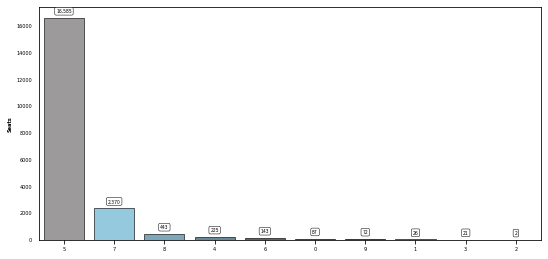

In [86]:
fig = plt.figure(figsize=(9,12))
gs = fig.add_gridspec(5,3)
gs.update(hspace=0.5, wspace=0.5)

pal = sns.dark_palette('skyblue', reverse=True)
pal.insert(0, '#9c9a9a')

# Countplot
ax0 = fig.add_subplot(gs[0:2,0:3])
ax0_s = sns.countplot(data=data,
                      x='seats', 
                      palette=pal, 
                      edgecolor='k', 
                      linewidth=0.6, 
                      order=[i for i in data.seats.value_counts().index])
ax0_s.tick_params(labelsize=5, left=False)
ax0_s.set_xlabel(None)
ax0_s.set_ylabel(ylabel='Seats', fontsize=5, weight='bold')

for p in ax0_s.patches:
    value = f"{p.get_height():,.0f}"
    x = p.get_x() + p.get_width()/2
    y = p.get_y() + p.get_height()+500
    ax0.text(x, y, value, fontsize=4.5, ha='center', va='center', 
             bbox=dict(facecolor='white', edgecolor='k', boxstyle='round', linewidth=0.5))

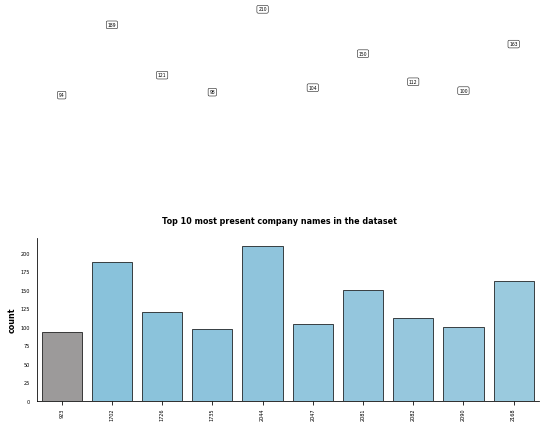

In [77]:
fig = plt.figure(figsize=(9,3))
gs = fig.add_gridspec(1,1)

cars = dataset.Company.value_counts().head(10)
pal = sns.light_palette('#79c6e8', n_colors=50, reverse=True)
pal[0] = '#9c9a9a'
ax = fig.add_subplot(gs[0,0])
ax=sns.barplot(x=cars.index, y=cars.values, edgecolor='k', linewidth=0.7, palette=pal)
ax.tick_params(axis='x', labelsize=5, rotation=90)
ax.tick_params(axis='y', labelsize=5, left=False)
ax.set_ylabel(ylabel='count', fontsize=8, weight='bold')

for p in ax.patches:
    value = f'{p.get_height():,.0f}'
    x = p.get_x() + p.get_width()/2
    y = p.get_y() + p.get_height()+320
    ax.text(x=x, y=y, s=value, fontsize=4.5, ha='center', va='center',
           bbox=dict(fc='white', edgecolor='k', boxstyle='round', linewidth=0.5))
    
fig.suptitle(t='Top 10 most present company names in the dataset', fontsize='8', weight='bold')
sns.despine()
plt.show()

#### Plot of Top 10 years with highest sales: 

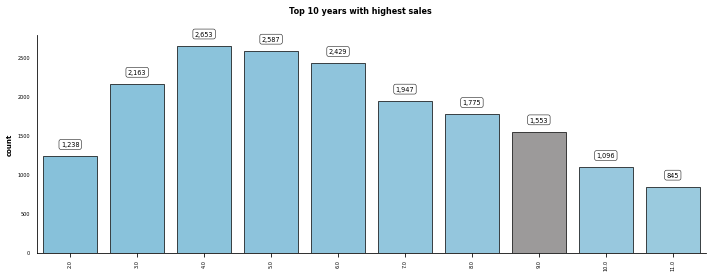

In [78]:
fig = plt.figure(figsize=(12,4))
gs = fig.add_gridspec(1,1)

cars = dataset.vehicle_age.value_counts().head(10)
pal = sns.light_palette('#79c6e8', n_colors=50, reverse=True)
pal[7] = '#9c9a9a'
ax = fig.add_subplot(gs[0,0])
ax=sns.barplot(x=cars.index, y=cars.values, edgecolor='k', linewidth=0.7, palette=pal)
ax.tick_params(axis='x', labelsize=5, rotation=90)
ax.tick_params(axis='y', labelsize=5, left=False)
ax.set_ylabel(ylabel='count', fontsize=7, weight='bold')

for p in ax.patches:
    value = f'{p.get_height():,.0f}'
    x = p.get_x() + p.get_width()/2
    y = p.get_y() + p.get_height()+150
    ax.text(x=x, y=y, s=value, fontsize=6.5, ha='center', va='center',
           bbox=dict(fc='white', edgecolor='k', boxstyle='round', linewidth=0.5))
    
fig.suptitle(t='Top 10 years with highest sales', fontsize='8', weight='bold')
sns.despine()
plt.show()

#### Bivariate Analysis:

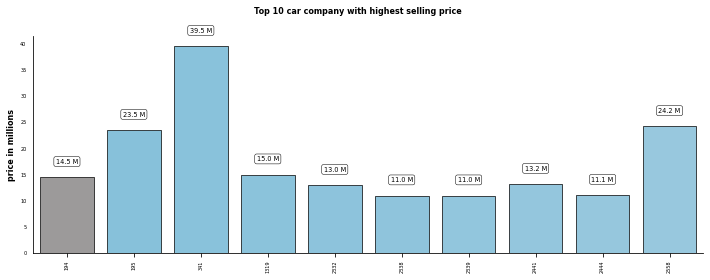

In [79]:
fig = plt.figure(figsize=(12,4))
gs = fig.add_gridspec(1,1)

pal = sns.light_palette('#79c6e8', reverse=True, n_colors=50)
pal.insert(0,'#9c9a9a')

cars = dataset.groupby('Company')['selling_price'].mean().sort_values(ascending=False).head(10)/1000000
ax = fig.add_subplot(gs[0,0])
ax=sns.barplot(x=cars.index, y=cars.values, edgecolor='k', linewidth=0.7, palette=pal)
ax.tick_params(axis='x', labelsize=5, rotation=90)
ax.tick_params(axis='y', labelsize=5, left=False)
ax.set_xlabel(xlabel=None)
ax.set_ylabel(ylabel='price in millions', fontsize=8, weight='bold')
for p in ax.patches:
    value = f'{p.get_height():,.1f}' + ' M'
    x = p.get_x() + p.get_width()/2
    y = p.get_y() + p.get_height()+3
    ax.text(x=x, y=y, s=value, fontsize=6.5, ha='center', va='center',
           bbox=dict(fc='white', edgecolor='k', boxstyle='round', linewidth=0.5))
    
fig.suptitle(t='Top 10 car company with highest selling price', fontsize=8, weight='bold')
sns.despine()
plt.show()

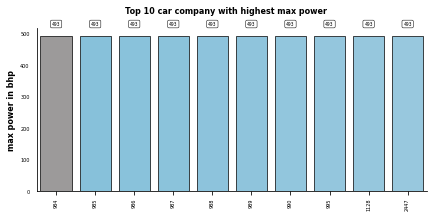

In [80]:
fig = plt.figure(figsize=(7,3))
gs = fig.add_gridspec(1,1)

pal = sns.light_palette('#79c6e8', reverse=True, n_colors=50)
pal.insert(0,'#9c9a9a')

cars = dataset.groupby('Company')['max_power'].mean().sort_values(ascending=False).head(10)
color = ['skyblue' for i in range(15)]
color[0] = 'grey'
ax = fig.add_subplot(gs[0,0])
ax=sns.barplot(x=cars.index, y=cars.values, edgecolor='k', linewidth=0.7, palette=pal)
ax.tick_params(axis='x', labelsize=5, rotation=90)
ax.tick_params(axis='y', labelsize=5, left=False)
ax.set_xlabel(xlabel=None)
ax.set_ylabel(ylabel='max power in bhp', fontsize=8, weight='bold')
for p in ax.patches:
    value = f'{p.get_height():,.0f}'
    x = p.get_x() + p.get_width()/2
    y = p.get_y() + p.get_height()+38
    ax.text(x=x, y=y, s=value, fontsize=4.5, ha='center', va='center',
           bbox=dict(fc='white', edgecolor='k', boxstyle='round', linewidth=0.5))
    
fig.suptitle(t='Top 10 car company with highest max power', fontsize=8, weight='bold')
sns.despine()
plt.show()

<AxesSubplot:>

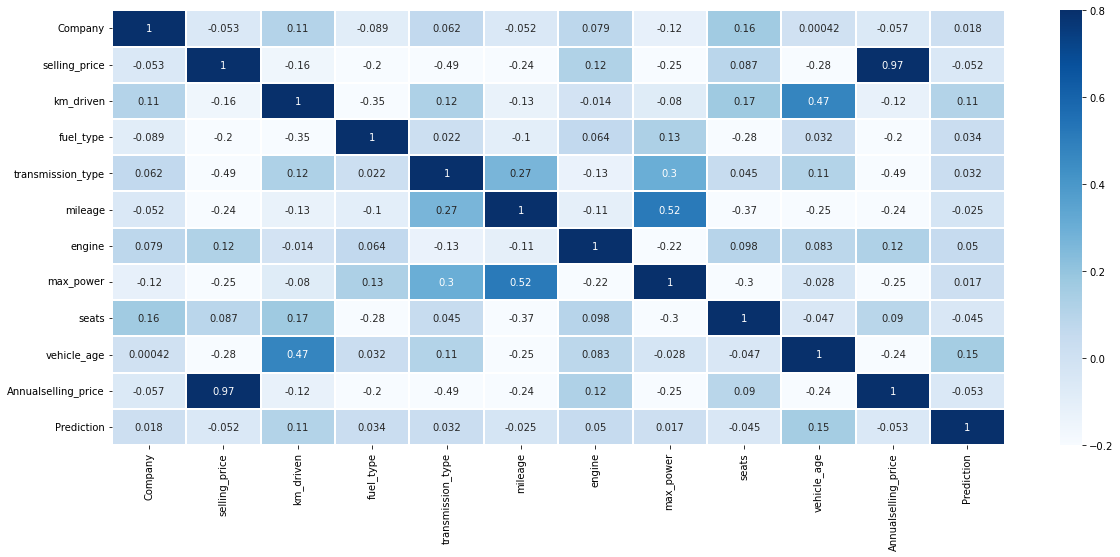

In [81]:
corrmatrix=dataset.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,annot=True,vmin=-0.2,vmax=0.8,linewidth=0.2,cmap='Blues')

#### Insights:
                    From the correlation matrix, it is clear that there is a high correlation between Annual selling price and selling price dependancy along with other variables.